<h1 align=center><font size = 5>Analyzing NYC High School Data</font></h1>

This guided project project has the purpose of analyzing and seeing the aspects that may influence the SAT scores in New York city high schools. 
The project consists in cleaning, combining and analyzing several datasets related to the [SAT scores](https://en.wikipedia.org/wiki/SAT) of high schoolers from different boroughs. Calculating the average of each school and checking the attributes per school. As explained in the [article](https://www.dataquest.io/blog/data-science-portfolio-project/):
> The SAT, or Scholastic Aptitude Test, is a test that high schoolers take in the US before applying to college. Colleges take the test scores into account when making admissions decisions, so it's fairly important to do well on. The test is divided into 3 sections, each of which is scored out of 800 points. The total score is out of 2400 (although this has changed back and forth a few times, the scores in this dataset are out of 2400). High schools are often ranked by their average SAT scores, and high SAT scores are considered a sign of how good a school district is.

The analysis reaches to look into the different characteristics of the schools to see how gender, localization and race differences influence the average SAT scores of the schools, to check out if there are evidences of the SAT tests being unfair with racial groups in the US.

## 1 Collecting our data

To make an analysis like it, we need to take a great variety of data. The data we are going to use is described bellow:
* [High School Directory](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) - directory containing information about each high school
* [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) — SAT scores for each high school in New York City.
* [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) — attendance information on every school in NYC.
* [Math test results](https://data.cityofnewyork.us/Education/NYS-Math-Test-Results-By-Grade-2006-2011-School-Le/jufi-gzgp) — math test results for every school in NYC.
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) — class size information for each school in NYC.
* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) — Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) — percentage of students who graduated, and other outcome information.
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) — demographic information for each school.
* [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) — surveys of parents, teachers, and students at each school.
* [School district maps](https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj) — contains information on the layout of the school districts, so that we can map them out.

To make it easier to use, all the datasets were uploaded in my Github repository that can be found in [this link](https://github.com/nathpignaton/guided_projects/tree/main/nyc-sat-analysis). 

And to complement our understanding about New York city, here are some background information to contextualize it better:  
- New York city is divided into 5 boroughs, which are essentially distinct regions;
- Schools in New York city are divided into several school districts, each of which can contain dozens of schools;
- Not all the schools in all of the dataset are high schools;
- Each school in New York city has a unique code called a `DNB` or District Borough Number;

## 2 Understanding our data
To start to learn about our datasets, we need to prepare the jupyter notebook with the libraries we are going to use. We are also going to change some default options so the information can be more clearly presented.

### 2.1 Setting up the environment
Lets import all libraries we need to clean, analyze and display the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# showing the graphs inline
%matplotlib inline

To help the visualization of the information, we are going to change the default options.

In [2]:
# telling pandas to show all columns when asked
pd.set_option('display.max_columns', None)

# centering the image outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")

### 2.2 Opening and reading the csv files
Now we are going to open our data from the Github repo and read it into pandas dataframes so we can start exploring it and cleaning it. First we are going to 

In [3]:
# creating a list with the name of the csv files
csv_files = ['ap_2010.csv', 
             'class_size.csv', 
             'demographics.csv', 
             'graduation.csv', 
             'hs_directory.csv', 
             'math_test_results.csv', 
             'sat_results.csv', 
             'school_attendence.csv']

# populating the dataframes with the csv files from the repository
data = {}
for f in csv_files:
    d = pd.read_csv('https://raw.githubusercontent.com/nathpignaton/guided_projects/main/nyc-sat-analysis/{}'.format(f))
    # creating the key without the .csv in the name and storing the data
    data[f.replace('.csv', '')] = d
    
# looking at the columns of each dataframe
for k in data.keys():
    print('\n {} \n {}'.format(k, data[k].columns))


 ap_2010 
 Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

 class_size 
 Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

 demographics 
 Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_

Looking at our data we can see some things:
- Most of the datasets contain the `DBN` column;
- Some fields look interesting for mapping;
- Some of the datasets appear to contain multiple rows for each school, showing that we'll have to do some preprocessing.  

Before coming back to our dataframes, let's read the information in the survey txt files.

### 2.3 Opening and reading the txt files
Now we are going to open our survey data and read it into pandas dataframes, almost in the same way we did before.  
We're going to store each survey in a different dataframe, they'll be called `all_survey` and `d75_survey`, after it we'll concatenate both into one `survey` dataframe. This files need a specific encoding to be read: `windows-1252`.

In [4]:
# reading the files into dataframes
all_survey = pd.read_csv("https://raw.githubusercontent.com/nathpignaton/guided_projects/main/nyc-sat-analysis/survey_all.txt", 
                         delimiter="\t", encoding="windows-1252")

d75_survey = pd.read_csv("https://raw.githubusercontent.com/nathpignaton/guided_projects/main/nyc-sat-analysis/survey_d75.txt", 
                         delimiter="\t", encoding="windows-1252")

# concatenating both
survey = pd.concat([all_survey, d75_survey], axis=0)

print(survey.shape)
survey.head()

(1702, 2773)


dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p    N_s   N_t  \
0         0.0           Elementary School   NaN    88    60    NaN  22.0   
1         0.0           Elementary School   NaN   100    60    NaN  34.0   
2         0.0           Elementary School   NaN    88    73    NaN  42.0   
3         0.0  Elementary / Middle School  89.0    73    50  145.0  29.0   
4         0.0           Elementary School   NaN   100    60    NaN  23.0   

     N_p  nr_s  nr_t  nr_p  saf_p_11  com_p_11  eng_p_11  aca_p_11  saf_t_11  \
0   90.0     0    25   150       8.5       7.6       7.5       7.8       7.5   
1  161.0     0    33   269       8.4       7.6       7.6       7.8       8.6   
2  367.0     0    48   505       8.9       8.3       8.3       8.6       7.6   
3  151.0   163    40   301       8.8       8.2       8.0       8.5       7.0   
4   90.0     0    23   151       8.7       7.9       8.1       7.9       8.4   

   com_t_11  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0       7.8       7.6       7.9       NaN       NaN       NaN       NaN   
1       8.5       8.9       9.1       NaN       NaN       NaN       NaN   
2       6.3       6.8       7.5       NaN       NaN       NaN       NaN   
3       6.2       6.8       7.8       6.2       5.9       6.5       7.4   
4       7.3       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  p_q2h  p_q7a  p_q7b  p_q7c  \
0         8.0         7.7         7.5         7.9    8.0    8.2    8.3    7.5   
1         8.5         8.1         8.2         8.4    7.7    7.9    8.0    7.3   
2         8.2         7.3         7.5         8.0    8.1    8.8    8.9    8.5   
3         7.3         6.7         7.1         7.9    8.1    8.5    8.8    8.2   
4         8.5         7.6         7.9         8.0    8.0    8.4    8.6    8.0   

   p_q7d  p_q8a  p_q8b  p_q8c  p_q8d  p_q8e  p_q8f  p_q2b  p_q2d  p_q2e  \
0    7.9    6.8    8.7    9.7    8.7    9.9    9.9    7.7    8.3    7.9   
1    7.7    6.5    8.8    9.4    8.7   10.0    9.9    7.5    8.2    7.9   
2    8.4    7.6    9.2    9.4    9.2    9.8    9.7    8.4    8.8    8.5   
3    8.3    7.3    9.2    9.4    9.1    9.8    9.7    8.3    8.7    8.3   
4    8.0    6.5    8.8    9.6    9.4   10.0   10.0    7.6    8.5    8.0   

   p_q2f  p_q2g  p_q3a  p_q3b  p_q4b  p_q4c  p_q11c  p_q2a  p_q2c  p_q3c  \
0    8.1    7.5    7.3    6.7    7.6    7.9     7.5    8.0    7.4    8.7   
1    8.0    7.2    7.0    6.9    8.0    8.4     7.4    7.6    7.1    9.0   
2    8.3    8.0    7.6    7.3    8.6    8.7     8.4    8.8    8.2    8.8   
3    8.1    7.6    7.6    7.5    8.6    8.6     8.4    8.5    8.1    8.8   
4    8.2    7.4    7.8    7.2    8.1    7.9     7.8    8.2    8.3    9.2   

   p_q6a  p_q6b  p_q11d  p_q11e  p_q5  p_q4a  p_q4d  p_q4e  p_q11a  p_q11b  \
0    6.3    6.6     7.6     7.6   7.4    7.8    7.4    NaN     8.3     7.5   
1    6.4    6.5     7.6     7.8   8.6    7.7    7.8    NaN     8.3     7.6   
2    7.9    6.8     8.5     8.5   8.7    8.6    8.5    NaN     8.9     8.4   
3    7.3    6.8     8.2     8.3   8.0    8.7    8.3    NaN     8.8     8.3   
4    7.4    7.0     7.9     7.9   8.8    8.2    7.8    NaN     8.1     7.6   

   p_q11f  p_q1  p_q3d  p_q9  p_q10  p_q12aa  p_q12ab  p_q12ac  p_q12ad  \
0     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
1     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
2     8.6   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
3     8.5   Na

As we can see above, the resulting dataframe has more than 2000 columns, so we see that we need to reduce it, since we do not need all of them and its easier to work with less columns.  
Thanks to the [dictionary of the survey data](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) we can keep the columns we know we'll need and remove the other ones.

In [5]:
# copying the data from `DBN` column to `dbn` column to fit the name pattern
survey['DBN'] = survey['dbn']

# selecting the columns we want
columns_filter = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", 
                  "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", 
                  "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# removing the other columns
survey = survey.loc[:, columns_filter]

# adding it to the dictionary
data['survey'] = survey

data['survey'].shape

(1702, 23)

Done that, we need to start cleaning and preparing the information do be displayed and analyzed.

## 3 Data Preprocessing

First thing will be to unify our data based on a common column, in our case this common column is `DBN`. DBN is the District Borough Number and it is the combination of the District Number, the letter code for the borough and the number of the school.   
To unify the datasets using DBN, we need to be sure that all of them are treated and in the same format.

### 3.1 Treating the `DBN` columns

We're going to need to change the names of the columns in every dataset but `hs_directory` dataframe, so they're all lowercase, and create the `dbn` column in the `class_size` dataset too.  

To help us understand what happened in the change, the loop has some specific phrases that tell us what happened to the entry: **name successfully changed**, **name already in lowercase** or **no DBN column**.  
We are also going to use a cool class that makes easy to print text with different colors in python. Bellow we are going to create it, the topic about different font printing in Python was found in StackOverflow [here](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python/8930747). 

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
# changin the name of the DBN columns to lower case (all of them)
for item in data.keys():
    if ('DBN') in data[item].columns: 
        data[item].rename({'DBN':'dbn'}, axis=1, inplace=True)
        print("The {} DBN column was changed to lowercase.".format(item))
    elif ('dbn') in data[item].columns:
        print("The {} DBN column is already lowercase.".format(item))
    else:
        # let's make this information a litte bit more visible
        print(color.BLUE + color.BOLD + "The {} has no DBN.".format(item) + color.END)

The ap_2010 DBN column was changed to lowercase.
The class_size has no DBN.
The demographics DBN column was changed to lowercase.
The graduation DBN column was changed to lowercase.
The hs_directory DBN column is already lowercase.
The math_test_results DBN column was changed to lowercase.
The sat_results DBN column was changed to lowercase.
The school_attendence has no DBN.
The survey DBN column was changed to lowercase.


As we can see above, the `class_size` and `school_attendence` have no `DBN` or `dbn` column, let's look at these specific dataframes to see if the information is there, in any other form. But first, let's look at the `dbn` values to see how they look like.

In [8]:
# a sample of what the dbn looks like
data['demographics']['dbn'].unique()

array(['01M015', '01M019', '01M020', ..., '32K554', '32K556', '32K564'],
      dtype=object)

As we can see above, the `dbn` values are made of two numbers, followed by a letter and other three numbers. With that in mind we can see that the information we need is already in `class_size` and `school attendence`. But the `school attendence` dataset is not separated by schools, it's separated by District. We are going to leave it as it is for now and treat it later.  

Let's start looking at the `class_size` columns.

In [9]:
data['class_size'].head()

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   
3                           -                               17.0   
4                           -                               15.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   
2                 1.0                17.0                    17.0   
3                 1.0                17.0                    17.0   
4                 1.0                15.0                    15.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  
0                   19.0         ATS                             NaN  
1                   21.0         ATS                             NaN  
2                   17.0         ATS                             NaN  
3                   17.0         ATS                             NaN  
4                   15.0         ATS                             NaN

As we can see above, the `DBN` is just the union of the `CSD` and `SCHOOL CODE` columns. But to do so we need to insert an extra 0 to the number when needed, since the `DBN` is composed by two numbers in the beginning, not one. After it we can concatenate the other values.

In [10]:
# creating a function to do it to the whole column
def insert_zero(number):
    # the number need to be a string to be concatenated
    string = str(number)
    size = len(string)
    # if it is a one digit number, it will turn it into a two digit number
    if size == 1:
        return string.zfill(2)
    # if it is a two digit number, nothing happens
    if size == 2:
        return string
    
# applying to the column
data['class_size']['two_digit_csd'] = data['class_size']['CSD'].apply(insert_zero)

# concateneting the columns
data['class_size']['dbn'] = data['class_size']['two_digit_csd'] + data['class_size']['SCHOOL CODE']

data['class_size'].head()

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   
3                           -                               17.0   
4                           -                               15.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   
2                 1.0                17.0                    17.0   
3                 1.0                17.0                    17.0   
4                 1.0                15.0                    15.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  \
0                   19.0         ATS                             NaN   
1                   21.0         ATS                             NaN   
2                   17.0         ATS                             NaN   
3                   17.0         ATS                             NaN   
4                   15.0         ATS                             NaN   

  two_digit_csd     dbn  
0            01  01M015  
1            01  01M015  
2            01  01M015  
3            01  01M015  
4            01  01M015

Following our treatment, we are going to analyze and look into the `sat_score` dataset.

### 3.2 Creating the main `sat_score` column in the `sat_results` dataframe 
To see what our problem looks like, let's print the dataset to see the columns and the information they store.

In [11]:
# checking out our data
data['sat_results'].head()

dbn                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    384

In [12]:
# converting the columns
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], 
                                                           errors='coerce')

data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], 
                                                                       errors='coerce')

data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'],
                                                              errors='coerce')

# calculating the sat_score column
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score']

data['sat_results'].head()

dbn                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  
0                404.0                   363.0     1122.0  
1                423.0                   366.0     1172.0  
2                402.0                   370.0     1149.0  
3                401.0                   359.0     1174.0  
4                433.0                   384.0     1207.0

Done that, we're going to extract the latitude and longitude values for each school in the `hs_directory`, so we can map the schools and uncover any geographic patterns.

### 3.3 Extracting the Latitude and Longitude from `hs_directory`
This will be done using a function that uses a regular expression to take the exact numbers we need.

In [13]:
import re

# latitude extractor
def extractor_lat(string):
    coords = re.findall("\(.+\)", string)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# longitude extractor
def extractor_long(string):
    coords = re.findall("\(.+\)", string)
    long = coords[0].split(",")[1].replace(")", "")
    return long

# using the functions to extract the latitude and longitude
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(extractor_lat)
data['hs_directory']['long'] = data['hs_directory']['Location 1'].apply(extractor_long)

print("lat\n", data['hs_directory']['lat'].head(), "\n\n", "long\n", data['hs_directory']['long'].head())

lat
 0    40.601989336
1    40.593593811
2    40.692133704
3    40.822303765
4    40.773670507
Name: lat, dtype: object 

 long
 0     -73.762834323
1     -73.984729232
2     -73.931503172
3      -73.85596139
4     -73.985268558
Name: long, dtype: object


Once we've done that, we still have to do a few things before combining the data. If we look close enough, we can see that the DBN values in the `class_size` dataframe are not unique.    


Since we are looking for the average SAT score per school, we need only the data correspondent to the later grades. We are also going to look the program types, each school has multiple program types, we are going to choose the largest category. Beyond that we need to check the class size, that has multiple entries due to the different subjects.

### 3.4 Working the `class_size` dataframe to contain unique DBNs

To do so, we are going to filter the `class_size` data so the `GRADE` column has only `09-12` grades. Next lets take a look into the `PROGRAM TYPE` column, only after it we can move on to the `CORE SUBJECT` column.

In [14]:
# creating a new variable to store the information
class_size = data['class_size']

# filtering GRADE values
class_size = class_size[class_size['GRADE '] == '09-12']

# checking the PROGAM TYPE values
class_size['PROGRAM TYPE'].value_counts()

GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64

As we saw above, `GEN ED` is the category with the most amount of entries, with that in mind, we are going to use it.

In [15]:
# filtering the PROGRAM TYPE
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

# checking the new df
class_size.describe(include='all')

CSD BOROUGH SCHOOL CODE  \
count   6513.000000    6513        6513   
unique          NaN       5         583   
top             NaN       K        K505   
freq            NaN    1927          21   
mean      14.266697     NaN         NaN   
std        9.275239     NaN         NaN   
min        1.000000     NaN         NaN   
25%        7.000000     NaN         NaN   
50%       13.000000     NaN         NaN   
75%       22.000000     NaN         NaN   
max       32.000000     NaN         NaN   

                                         SCHOOL NAME GRADE  PROGRAM TYPE  \
count                                           6513   6513         6513   
unique                                           583      1            1   
top     Bronx School for Law, Government and Justice  09-12       GEN ED   
freq                                              21   6513         6513   
mean                                             NaN    NaN          NaN   
std                                              NaN    NaN          NaN   
min                                              NaN    NaN          NaN   
25%                                              NaN    NaN          NaN   
50%                                              NaN    NaN          NaN   
75%                                              NaN    NaN          NaN   
max                                              NaN    NaN          NaN   

       CORE SUBJECT (MS CORE and 9-12 ONLY)  \
count                                  6513   
unique                                    4   
top                                 ENGLISH   
freq                                   1977   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

       CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
count                                 6513                        6513   
unique                                  22                           1   
top                     Integrated Algebra                           -   
freq                                   449                        6513   
mean                                   NaN                         NaN   
std                                    NaN                         NaN   
min                                    NaN                         NaN   
25%                                    NaN                         NaN   
50%                                    NaN                         NaN   
75%                                    NaN                         NaN   
max                                    NaN                         NaN   

        NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
count                         6513.000000         6513.000000   
unique                                NaN                 NaN   
top                                   NaN                 NaN   
freq                                  NaN                 NaN   
mean                           177.045755            6.682788   
std                            253.464004            8.506092   
min                              6.000000            1.000000   
25%                             54.000000            2.000000   
50%                             95.000000            4.000000   
75%                            184.000000            7.000000   
max                           2965.000000          100.000000   

        AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
count          6513.000000             6513.000000            6513.000000   
unique                 NaN                     NaN                    NaN   
top                    NaN                     NaN                    NaN   
freq                   NaN                 

Now that we've filtered the information, we still need to group the information to show it per DBN. Looking closely into the columns, we can see that the class sizes are separated into major subjects and other specific subjects related. This isn't relevant for us, since our objective is to analyze data per school.

In [16]:
# looking into the CORE SUBJECT column
class_size.head()

CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -   
226                          English 10                           -   
227                          English 11                           -   
228                          English 12                           -   
229                  Integrated Algebra                           -   

     NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
225                               63.0                 3.0   
226                               79.0                 3.0   
227                               38.0                 2.0   
228                               69.0                 3.0   
229                               53.0                 3.0   

     AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
225                21.0                    19.0                   25.0   
226                26.3                    24.0                   31.0   
227                19.0                    16.0                   22.0   
228                23.0                    13.0                   30.0   
229                17.7                    16.0                   21.0   

    DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO two_digit_csd     dbn  
225       STARS                             NaN            01  01M292  
226       STARS                             NaN            01  01M292  
227       STARS                             NaN            01  01M292  
228       STARS                             NaN            01  01M292  
229       STARS                             NaN            01  01M292

With that in mind, we are going to group the dataset calculating the averages per DBN.

In [17]:
# storing the dataset into a new variable
grouped = class_size.groupby('dbn')

# calculating the mean 
class_size = grouped.agg(np.mean)

# reseting index and turning dbn into a column again
class_size = class_size.reset_index() 

# assigning it back to the dictionary
data['class_size'] = class_size

data['class_size'].head()

dbn  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN

Next we are going to treat the `demographics` dataframe to contain only unique DBNs.

### 3.5 Working the `demographics`  dataframe to contain unique DBNs 
In this dataframe, the main problem is related to the school year. The dataset has information from various years. In our analysis we are going to use only the most recent data, so we are going to filter the `20112012` data.

In [18]:
# storing the dataset into a new variable
demographics = data['demographics']

# filtering the entries
demographics = demographics[demographics['schoolyear'] == 20112012]

# assigning it back to the dictionary
data['demographics'] = demographics

data['demographics'].head()

dbn                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2 grade3  \
6         NaN         89.4               189   13   31     35     28     25   
13        NaN         61.5               328   32   46     52     54     52   
20        NaN         92.5               626   52  102    121     87     88   
27        NaN         99.7               401   14   34     38     36     45   
35        NaN         78.9               176   18   20     30     21     31   

   grade4 grade5 grade6 grade7 grade8 grade9 grade10 grade11 grade12  ell_num  \
6      28     29                                                         20.0   
13     46     46                                                         33.0   
20     85     91                                                        128.0   
27     28     40     55     55     56                                    34.0   
35     26     30                                                          6.0   

    ell_percent  sped_num  sped_percent ctt_num selfcontained_num  asian_num  \
6          10.6      40.0          21.2      23                 7         12   
13         10.1      59.0          18.0      16                16         51   
20         20.4      97.0          15.5      49                31        190   
27          8.5     106.0          26.4      59                16         22   
35          3.4      45.0          25.6      34                 4          9   

    asian_per  black_num  black_per  hispanic_num  hispanic_per  white_num  \
6         6.3         63       33.3           109          57.7          4   
13       15.5         81       24.7           158          48.2         28   
20       30.4         55        8.8           357          57.0         16   
27        5.5         90       22.4           275          68.6          8   
35        5.1         41       23.3           110          62.5         15   

    white_per  male_num  male_per  female_num  female_per  
6         2.1      97.0      51.3        92.0        48.7  
13        8.5     147.0      44.8       181.0        55.2  
20        2.6     330.0      52.7       296.0        47.3  
27        2.0     204.0      50.9       197.0        49.1  
35        8.5      97.0      55.1        79.0        44.9

Done that we will move to the last dataframe to condense `gradutation`.

### 3.6 Working the `graduation`  dataframe to contain unique DBNs
In the graduation dataframe, the `Demographic` and `Cohort` are the ones preventing the DBN to be unique. `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is **2006**. We also want data from the full cohort, so we'll only pick rows where Demographic is **Total Cohort**.  
Let's filter the dataset.

In [19]:
# storing the dataset into a new variable
graduation = data['graduation']

# filtering both columns
graduation = graduation[graduation['Cohort'] == '2006']
graduation = graduation[graduation['Demographic'] == 'Total Cohort']

# assigning it back to the dictionary
data['graduation'] = graduation

data['graduation'].head()

Demographic     dbn                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  \
3                          46.2                        83.7   
10                         33.9                        79.2   
17                         74.4                        95.7   
24                         47.6                        85.1   
31                         47.2                        86.7   

   Advanced Regents - n  Advanced Regents - % of cohort  \
3                     0                             0.0   
10                    8                             6.5   
17                    0                             0.0   
24                   17                            20.2   
31                   69                            35.8   

    Advanced Regents - % of grads Regents w/o Advanced - n  \
3                             0.0                       36   
10                           15.1                       34   
17                            0.0                       67   
24                           36.2                       23   
31                           65.7                       22   

    Regents w/o Advanced - % of cohort  Regents w/o Advanced - % of grads  \
3                                 46.2                               83.7   
10                                27.4                               64.2   
17                                74.4                               95.7   
24                                27.4                               48.9   
31                                11.4                               21.0   

   Local - n  Local - % of cohort  Local - % of grads Still Enrolled - n  \
3          7                  9.0                16.3                 16   
10        11                  8.9                20.8                 46   
17         3                  3.3                 4.3                 15   
24         7                  8.3                14.9                 25   
31        14                  7.3                13.3                 53   

    Still Enrolled - % of cohort Dropped Out - n  Dropped Out - % of cohort  
3                           20.5              11                       14.1  
10                          37.1              20                       16.1  
17                          16.7               5                        5.6  
24                          29.8               5                        6.0  
31                          27.5              35                       18.1

After treating the unique DBNs, we still need to treat the `ap_2010` dataframe, because it has numeric values stored as strings.

### 3.7 Converting string numeric values to the right datatype
There are three columns we need this change to happen: `AP Test Takers `, `Total Exams Taken` and `Number of Exams with scores 3 4 or 5`. We'll do a loop to convert all of them.

In [20]:
# creating a list with the columns we need to convert
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# loop to conversion
for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')
    
data['ap_2010'].dtypes

dbn                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Now we are finally ready do merge our datasets.

## 4 Combining the Data
To do so, we are going to merge the data in a strategic way to always keep the most amount of DBNs possible, not removing any entry.

### 4.1 Merging the datasets one by one
With the objective of not losing any important value, we are going to merge the datasets using two different approaches, left and inner join.

In [21]:
# storing the dataset into a new variable
combined = data['sat_results']

# combining dataset per dataset, based on the DBNs in the sat_results
combined = combined.merge(data['ap_2010'], how='left', on='dbn')
combined = combined.merge(data['graduation'], how='left', on='dbn')

print(combined.shape)
combined.head()

(479, 33)


dbn                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0                   359.0     1174.0   
4                433.0                   384.0     1207.0   

                     SchoolName  AP Test Takers   Total Exams Taken  \
0                           NaN              NaN                NaN   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2        EAST SIDE COMMUNITY HS             19.0               21.0   
3                           NaN              NaN                NaN   
4                           NaN              NaN                NaN   

   Number of Exams with scores 3 4 or 5   Demographic  \
0                                   NaN  Total Cohort   
1                                  10.0  Total Cohort   
2                                   NaN  Total Cohort   
3                                   NaN           NaN   
4                                   NaN  Total Cohort   

                             School Name Cohort  Total Cohort Total Grads - n  \
0  HENRY STREET SCHOOL FOR INTERNATIONAL   2006          78.0              43   
1    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006         124.0              53   
2             EAST SIDE COMMUNITY SCHOOL   2006          90.0              70   
3                                    NaN    NaN           NaN             NaN   
4                MARTA VALLE HIGH SCHOOL   2006          84.0              47   

   Total Grads - % of cohort Total Regents - n  Total Regents - % of cohort  \
0                       55.1                36                         46.2   
1                       42.7                42                         33.9   
2                       77.8                67                         74.4   
3                        NaN               NaN                          NaN   
4                       56.0                40                         47.6   

   Total Regents - % of grads Advanced Regents - n  \
0                        83.7                    0   
1                        79.2                    8   
2                        95.7                    0   
3                         NaN                  NaN   
4                        85.1                   17   

   Advanced Regents - % of cohort  Advanced Regents - % of grads  \
0                             0.0                            0.0   
1                             6.5                           15.1   
2                             0.0                            0.0   
3                             NaN                            NaN   
4                            20.2                           36.2   

  Regents w/o Advanced - n  Regents w/o Advanced - % of cohort  \
0                       36                                46.2   
1                       34                                27.4   
2                       67                                74.4   
3                      NaN                                 NaN   
4                       23                                27.4   

   Regents w/o Advanced - % of grads Local - n  

In [22]:
# combining the datasets keeping only the entries in both dataframes
combined = combined.merge(data['class_size'], how='inner', on='dbn')
combined = combined.merge(data['demographics'], how='inner', on='dbn')
combined = combined.merge(data['survey'], how='inner', on='dbn')
combined = combined.merge(data['hs_directory'], how='inner', on='dbn')

print(combined.shape)
combined.head()

(363, 164)


dbn                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  \
0                             NaN              NaN                NaN   
1    UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2          EAST SIDE COMMUNITY HS             19.0               21.0   
3                             NaN              NaN                NaN   
4  NEW EXPLORATIONS SCI,TECH,MATH            255.0              377.0   

   Number of Exams with scores 3 4 or 5   Demographic  \
0                                   NaN  Total Cohort   
1                                  10.0  Total Cohort   
2                                   NaN  Total Cohort   
3                                   NaN  Total Cohort   
4                                 191.0  Total Cohort   

                             School Name Cohort  Total Cohort Total Grads - n  \
0  HENRY STREET SCHOOL FOR INTERNATIONAL   2006          78.0              43   
1    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006         124.0              53   
2             EAST SIDE COMMUNITY SCHOOL   2006          90.0              70   
3                MARTA VALLE HIGH SCHOOL   2006          84.0              47   
4  NEW EXPLORATIONS INTO SCIENCE  TECHNO   2006          46.0              46   

   Total Grads - % of cohort Total Regents - n  Total Regents - % of cohort  \
0                       55.1                36                         46.2   
1                       42.7                42                         33.9   
2                       77.8                67                         74.4   
3                       56.0                40                         47.6   
4                      100.0                46                        100.0   

   Total Regents - % of grads Advanced Regents - n  \
0                        83.7                    0   
1                        79.2                    8   
2                        95.7                    0   
3                        85.1                   17   
4                       100.0                   31   

   Advanced Regents - % of cohort  Advanced Regents - % of grads  \
0                             0.0                            0.0   
1                             6.5                           15.1   
2                             0.0                            0.0   
3                            20.2                           36.2   
4                            67.4                           67.4   

  Regents w/o Advanced - n  Regents w/o Advanced - % of cohort  \
0                       36                                46.2   
1                       34                                27.4   
2                       67                                74.4   
3                       23                                27.4   
4                       15                                32.6   

   Regents w

Now that we've combined the data we can see that a lot of entries are missing, this is the result of the left joins we did. It happened because some DBNs did not have that information. To follow our analysis, we are going to fill this values with the mean of the correspondent column.

### 4.2 Dealing with missing values
We are going to use some methods to calculate the means and to fill the blank values with them.

In [23]:
# calculating the means
means = combined.mean()

# filling the missing values
combined = combined.fillna(means)
combined = combined.fillna(0)

# printing null values per column if they exist
for column in combined.columns:
    if combined[column].isnull().sum() != 0:
        print("{}: {}".format(column, combined[column].isnull().sum()))
    else:
        pass

Finished with the null values, we'll create a new column in our dataset to make an interesting analysis of the information we have, looking at in from a different angle.

### 4.3 Creating a column to store the district
Before analyzing our data, we are going to create a new column in the combined dataset with the two first characters of the schools DBN, correspondent to the district. This will be done with the objective of analyzing the information in a district level.

In [24]:
# creating a function that extracts the first two chars
def two_chars(string):
    return string[0:2]

# applying it to the whole column of dbn, storing in a new column
combined['school_dist'] = combined['dbn'].apply(two_chars)

combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

Once we've done that, we can start to look for insights in the dataset we've built. First thin we are going to do is look for correlations.

## 5 Looking for correlations
Searching for correlations in a table manner would be very inconvenient for our data, since it has too many columns. With that in mind, we are going to plot heatmaps per group containing the correlations.  
We will start treating the dataframe to plot the heatmaps, after it we will create variables containing the columns of each group. We will start the analysis with the surveys of the parents, students and teachers.

In [25]:
corr = pd.DataFrame(combined.corr()['sat_score'])
corr.sort_values('sat_score', ascending=False, inplace=True)
corr.head(15)

sat_score
sat_score                              1.000000
SAT Writing Avg. Score                 0.987771
SAT Critical Reading Avg. Score        0.986820
SAT Math Avg. Score                    0.972643
Advanced Regents - % of cohort         0.771566
Advanced Regents - % of grads          0.739927
Total Regents - % of cohort            0.667603
white_per                              0.620718
Total Grads - % of cohort              0.584234
asian_per                              0.570730
AP Test Takers                         0.523140
Total Exams Taken                      0.514333
Total Regents - % of grads             0.494732
asian_num                              0.475445
Number of Exams with scores 3 4 or 5   0.463245

After treating the data to be plotted, we can start the analysis. 

### 5.1 Survey Correlations
The columns related to surveys were easy, since we've selected them before when we were merging them to the main dataframe. After plotting the map, we will be able to see which ones are correlated to the `sat_results`, with the name of the column, we can consult the dictionary of the data to understand the mean of that number.

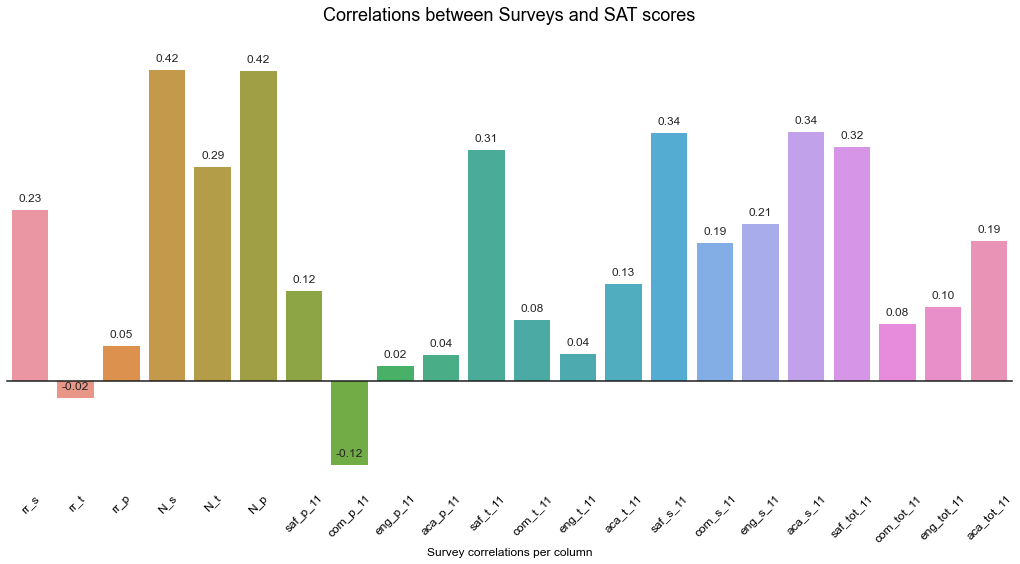

In [26]:
# group of columns related to parents, students and teachers surveys
surveys = ['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 
           'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 
           'com_tot_11', 'eng_tot_11', 'aca_tot_11']

# configurating the size of the plot
fig, ax = plt.subplots(figsize=(18, 8))

# plotting a bar graph
barplot = sns.barplot(x=surveys, y='sat_score', data=corr.loc[surveys], ax=ax)

# configurating the plot
plt.setp(fig.axes, yticks=[])
plt.xticks(rotation=45, size=12)
plt.xlabel("")
plt.yticks(size=12)
plt.tick_params(bottom=False)

ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("", size=12)
ax.set_xlabel("Survey correlations per column", size=12)
ax.set_title("Correlations between Surveys and SAT scores", size=18, pad=30)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

# annotating the values in the bars
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width()/2., bar.get_height()), 
                    ha='center', va='center', size=12, xytext=(0,12),
                    textcoords='offset points')


plt.show()

Checking our graph ant the data dictionary, we can see summarize the information in a table:  

| Column | Correlation | Information |  
| :--: | :--: | :--: |  
| N_s | 0.42 | Number of students respondents. |  
| N_p | 0.42 | Number of parents respondents. |
| saf_s_11 | 0.34 | Safety and respect score based on student responses. |
| aca_s_11 | 0.34 | Academic expectations score based on teachers responses. |
| saf_tot_11 | 0.32 | Safety and respect total score. |
| saf_t_11 | 0.31 | Safety and respect score based on teachers responses. |  


Above we can see no strong correlations, just moderate ones. The ones that are higher: Number of students and number of parents respondents, don't tell us much about how the sat score is influenced by the surveys.  
On the other hand, it is very interesting to see how the **safety scores** of teachers and students relate to the sat. Let's plot some graphs to see how they behave per district, checking for different patterns in different locations.  

#### Computing scores per district
To do so, we are going to do scatter plots per column, with the objective of looking closely to the differences between the safety scores, then we can plot another bar plot to show the correlation with the sat scores. After it we are going to look closer to each Borough's average safety scores and sat_scores. 

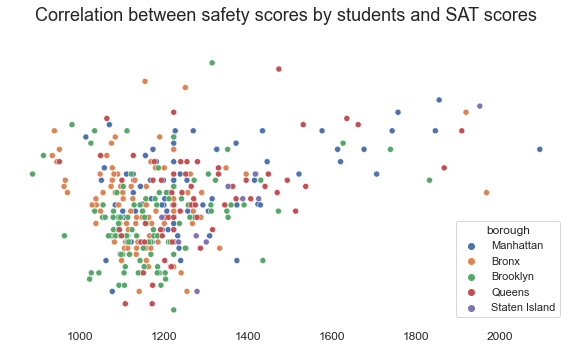

In [27]:
# configurating the size of the image
fig = plt.figure(figsize=(10,5))

# creating the scatter plot
ax = sns.scatterplot(data=combined, x='sat_score', y='saf_s_11', hue='borough')

# configurating the plot
ax.set_ylabel("", size=12)
ax.set_xlabel("SAT scores", size=12)
ax.set_title("Correlation between safety scores by students and SAT scores", size=18, pad=30)

plt.setp(fig.axes, yticks=[])
plt.xticks(size=12)
plt.xlabel("")
plt.yticks(size=12)
plt.tick_params(bottom=False)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

plt.show()

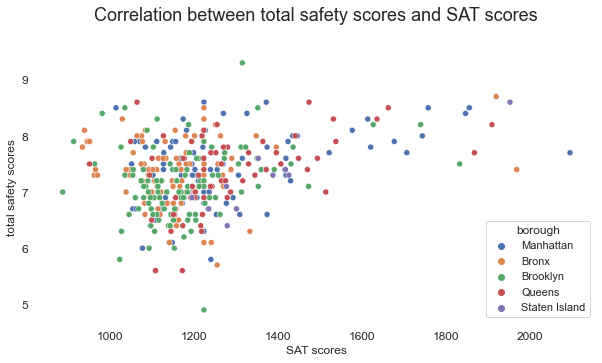

In [28]:
# configurating the size of the image
fig = plt.figure(figsize=(10,5))

# creating the scatter plot
ax = sns.scatterplot(data=combined, x='sat_score', y='saf_tot_11', hue='borough')

# configurating the plot
ax.set_ylabel("total safety scores", size=12)
ax.set_xlabel("SAT scores", size=12)
ax.set_title("Correlation between total safety scores and SAT scores", size=18, pad=30)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tick_params(bottom=False)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

plt.show()

Based on the graphs above, we can see that in the SAT scores until 1400 there's no visible correlation, making us believe that the safety scores doesn't make a significant difference. On the other hand, between 1400 and 2000 we see no schools with safety scores lower than 7, also there's a small positive correlation, showing that the safer could have greater grades. It is a little bit tricky to get, maybe looking closer into the borough's overall safety, we can find more significant information.

In [29]:
# grouping per district
group_by = ['saf_s_11', 'saf_tot_11', 'saf_t_11', 'sat_score']
borough_group = combined.pivot_table(values=group_by, columns = 'borough', aggfunc=np.mean)
borough_group = borough_group.T
borough_group

saf_s_11  saf_t_11  saf_tot_11    sat_score
borough                                                   
Bronx          6.606577  7.026882    7.322581  1157.598203
Brooklyn       6.370755  6.985849    7.129245  1181.364461
Manhattan      6.831370  7.287778    7.473333  1278.331410
Queens         6.721875  7.365625    7.387500  1286.753032
Staten Island  6.530000  7.210000    7.200000  1382.500000

Looking the grouped information, we can see that **Brooklyn** has the overall smallest safety scores, followed by **Staten Island** and **Bronx**. This makes us believe that people that live in this boroughs have a sense of insecurity and it, somehow, relates to the SAT score of the students.  
After this analysis, we are going to investigate the relation between the race of students and their SAT scores.

### 5.2 Races Correlations
Following our project, we are going to dig deeper into the races of the students, analyzing the correlations between them and the scores. To start we will make a bar plot with the correlations between the percentage of each race in each school and their respective sat scores.

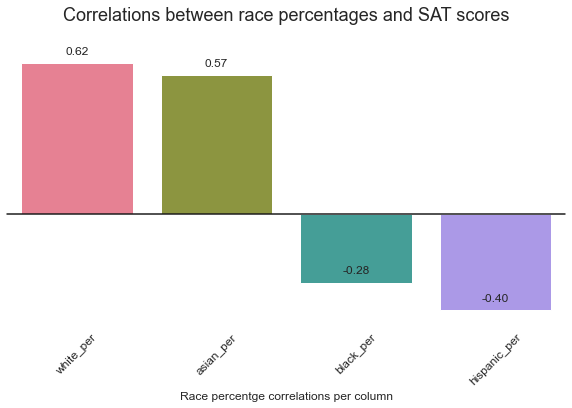

In [30]:
# list of columns we are going to use
race_percentage = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

# configurating the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))

# plotting a bar graph
barplot = sns.barplot(x=race_percentage, y='sat_score', data=corr.loc[race_percentage], ax=ax, palette="husl")

# configurating the plot
plt.setp(fig.axes, yticks=[])
plt.xticks(rotation=45, size=12)
plt.xlabel("")
plt.yticks(size=12)
plt.tick_params(bottom=False)

ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("", size=12)
ax.set_xlabel("Race percentge correlations per column", size=12)
ax.set_title("Correlations between race percentages and SAT scores", size=18, pad=30)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

# annotating the values in the bars
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width()/2., bar.get_height()), 
                    ha='center', va='center', size=12, xytext=(0,12),
                    textcoords='offset points')


plt.show()

As we can see above, white and Asian correlate positively with the sat scores, showing that schools with a high amount of white and Asian students have overall better grades than those with smaller percentages. While Black and Hispanic show a negative correlation, indicating that the greater the percentage is, the smaller the average of SAT scores are. This doesn't mean causation, the SAT scores are not necessarily smaller because of this percentage, the correlations show only a possibility based on the numbers. 
With that in mind, we can see a clear lack of balance between the races. To investigate it better, let's look closer the schools with high percentages of Hispanic students creating a scatter plot between `hispanic_per` and `sat_score`.

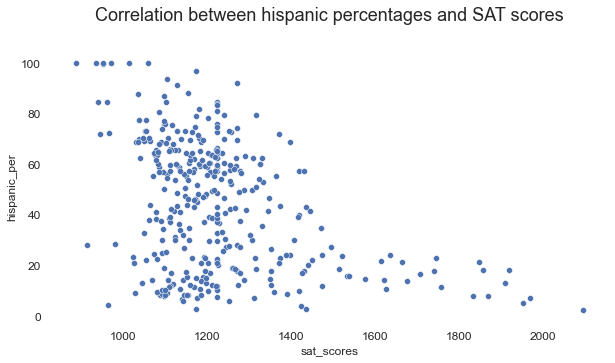

In [31]:
# configurating the size of the image
fig = plt.figure(figsize=(10,5))

# creating the scatter plot
ax = sns.scatterplot(data=combined, x='sat_score', y='hispanic_per')

# configurating the plot
ax.set_ylabel("hispanic_per", size=12)
ax.set_xlabel("sat_scores", size=12)
ax.set_title("Correlation between hispanic percentages and SAT scores", size=18, pad=30)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tick_params(bottom=False)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

plt.show()

As we can see above, it is difficult to see a clear correlation, but it is interesting to see that schools with **more than 30%** of hispanic students **don't seem to reach scores greater than 1500**, while the schools with **less than 30%** have a **wider range of grades**.    

With than in mind we are going to look closer to the schools with the greater and the smaller hispanic percentages, looking for other characteristics that may make them similar.

In [32]:
# schools with more than 95% of hispanic students
combined.loc[combined['hispanic_per']>95,
            ['SCHOOL NAME', 'hispanic_per', 'asian_per', 'black_per', 'white_per', 'borough', 'sat_score']]

SCHOOL NAME  hispanic_per  \
44                       MANHATTAN BRIDGES HIGH SCHOOL          99.8   
82    WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL          96.7   
89   GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...          99.8   
125                ACADEMY FOR LANGUAGE AND TECHNOLOGY          99.4   
141              INTERNATIONAL SCHOOL FOR LIBERAL ARTS          99.8   
176   PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE          99.8   
253                          MULTICULTURAL HIGH SCHOOL          99.8   
286             PAN AMERICAN INTERNATIONAL HIGH SCHOOL         100.0   

     asian_per  black_per  white_per    borough  sat_score  
44         0.2        0.0        0.0  Manhattan     1058.0  
82         0.0        2.3        0.3  Manhattan     1174.0  
89         0.0        0.0        0.0  Manhattan     1014.0  
125        0.0        0.6        0.0      Bronx      951.0  
141        0.2        0.0        0.0      Bronx      934.0  
176        0.0        0.0        0.0      Bronx      970.0  
253        0.0        0.2        0.0   Brooklyn      887.0  
286        0.0        0.0        0.0     Queens      951.0

The dataframe above shows us that almost all schools with more than 95% of hispanic students, have almost all of them with a range of 99.4 to 99.8, one school with 100% and another with 96.7%. By the name of the schools we can see that the reason behind this percentage being high is probably the international motivation of the schools.

Other important observations are that the **Pan American International High School at Monroe** accepts only Latino immigrants and that there is only one school with this high percentage in Brooklyn and Queens, on the other hand there are three in Manhattan and Bronx. That could be a reflex of the population characteristics in these boroughs.    


After that we are going to take a look at the schools with percentage of hispanic students less than 10% and with SAT scores lower to 1800.

In [33]:
# printing the schools we need
combined.loc[(combined['hispanic_per']<10) & (combined['sat_score']<1800), 
            ['SCHOOL NAME', 'hispanic_per', 'asian_per', 'black_per', 'white_per', 'borough', 'sat_score']]

SCHOOL NAME  hispanic_per  \
46     HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES           4.0   
192                        BEDFORD ACADEMY HIGH SCHOOL           7.1   
194                          BENJAMIN BANNEKER ACADEMY           8.8   
220                         BOYS AND GIRLS HIGH SCHOOL           7.8   
223  ACADEMY FOR COLLEGE PREPARATION AND CAREER EXP...           6.7   
226             THE HIGH SCHOOL FOR GLOBAL CITIZENSHIP           7.3   
227                       SCHOOL FOR HUMAN RIGHTS, THE           8.3   
228                SCHOOL FOR DEMOCRACY AND LEADERSHIP           8.4   
229  HIGH SCHOOL FOR YOUTH AND COMMUNITY DEVELOPMEN...           9.1   
230      HIGH SCHOOL FOR SERVICE & LEARNING AT ERASMUS           9.0   
231  SCIENCE, TECHNOLOGY AND RESEARCH EARLY COLLEGE...           9.4   
235            MEDGAR EVERS COLLEGE PREPARATORY SCHOOL           2.8   
236                           CLARA BARTON HIGH SCHOOL           5.8   
237                         IT TAKES A VILLAGE ACADEMY           4.5   
238                         BROOKLYN GENERATION SCHOOL           8.5   
240            KURT HAHN EXPEDITIONARY LEARNING SCHOOL           8.8   
241                     VICTORY COLLEGIATE HIGH SCHOOL           5.8   
242                   ARTS & MEDIA PREPARATORY ACADEMY           9.6   
280        BROOKLYN COLLEGIATE: A COLLEGE BOARD SCHOOL           8.3   
330                         QUEENS PREPARATORY ACADEMY           8.2   
331  PATHWAYS COLLEGE PREPARATORY SCHOOL: A COLLEGE...           2.9   
332                  EXCELSIOR PREPARATORY HIGH SCHOOL           9.7   
335                            CAMBRIA HEIGHTS ACADEMY           7.5   
337               HUMANITIES & ARTS MAGNET HIGH SCHOOL           8.5   
353                            TOTTENVILLE HIGH SCHOOL           9.9   

     asian_per  black_per  white_per        borough    sat_score  
46        89.5        3.4        2.3      Manhattan  1424.000000  
192        2.7       89.4        0.3       Brooklyn  1312.000000  
194        2.7       87.0        0.4       Brooklyn  1391.000000  
220        0.5       90.0        0.7       Brooklyn  1097.000000  
223        0.2       92.0        1.1       Brooklyn  1139.000000  
226        1.5       89.2        1.5       Brooklyn  1176.000000  
227        0.8       88.9        1.6       Brooklyn  1088.000000  
228        0.5       89.4        1.5       Brooklyn  1153.000000  
229        1.0       87.3        1.0       Brooklyn  1027.000000  
230        2.1       87.0        1.7       Brooklyn  1105.000000  
231        3.1       83.9        1.3       Brooklyn  1360.000000  
235        0.9       95.7        0.0       Brooklyn  1436.000000  
236        1.8       91.2        0.7       Brooklyn  1251.000000  
237        1.8       92.9        0.5       Brooklyn   963.000000  
238        1.5       88.8        0.9       Brooklyn  1145.000000  
240        0.0       88.1        1.7       Brooklyn  1092.000000  
241        0.3       93.5        0.0       Brooklyn  1143.000000  
242        0.7       89.4        0.0       Brooklyn  1080.000000  
280        1.9       88.1        0.5       Brooklyn  1185.000000  
330        5.2       84.4        0.9         Queens  1099.000000  
331        2.2       94.2        0.7         Queens  1173.000000  
332        4.3       82.8        0.5         Queens  1202.000000  
335        3.4       87.1        2.0         Queens  1223.438806  
337        4.0       85.9        1.5         Queens  1151.000000  
353        5.4        2.1       82.1  Staten Island  1418.000000

As before, we can see that the schools are **mainly located in** two boroughs: **Brooklyn and Queens**, both of them may be correlated to the reality of the borough population. **Staten Island** shows a **very small amount of other races that are not white**, so it may not be correlated specifically with hispanic, and the school located in Manhattan with 4.0 percent of hispanic students is **HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES**, this shows that probably the smaller amout of other races is related to the emphasis in the asian students.   


To illustrate the difference between the borough population, we can take a look at the information taken from the [US Census of 2010](https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/POP010210) that specifies the races percentages in the NYC Boroughs in that year, after it no census were made, just predictions, the next is from 2019 and is doesn't help us.

In [34]:
# importing the csv with raw data
demographics_raw = pd.read_csv('https://raw.githubusercontent.com/nathpignaton/guided_projects/main/nyc-sat-analysis/QuickFactsNY.csv')

# renaming the columns
new_columns = {'Bronx County (Bronx Borough), New York': 'Bronx', 'Kings County (Brooklyn Borough), New York': 'Brooklyn', 
               'New York County (Manhattan Borough), New York': 'Manhattan', 
               'Queens County (Queens Borough), New York': 'Queens',
               'Richmond County (Staten Island Borough), New York': 'Staten Island'}

demographics_raw.rename(columns=new_columns, inplace=True)

# creating a df with the columns we need
demographics = demographics_raw[['Fact', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']]

# filtering the info
demographics = demographics[(demographics['Fact'] == 'White alone, percent') |  
                            (demographics['Fact'] == 'Black or African American alone, percent') |
                            (demographics['Fact'] == 'American Indian and Alaska Native alone, percent') |
                            (demographics['Fact'] == 'Asian alone, percent') |
                            (demographics['Fact'] == 'Native Hawaiian and Other Pacific Islander alone, percent') |
                            (demographics['Fact'] == 'Two or More Races, percent') |
                            (demographics['Fact'] == 'Hispanic or Latino, percent') |
                            (demographics['Fact'] == 'White alone, not Hispanic or Latino, percent')]

demographics

Fact  Bronx Brooklyn  \
8                                White alone, percent  44.7%    49.8%   
9            Black or African American alone, percent  43.6%    33.8%   
10   American Indian and Alaska Native alone, percent   2.9%     0.9%   
11                               Asian alone, percent   4.6%    12.7%   
12  Native Hawaiian and Other Pacific Islander alo...   0.4%     0.1%   
13                         Two or More Races, percent   3.8%     2.7%   
14                        Hispanic or Latino, percent  56.4%    18.9%   
15       White alone, not Hispanic or Latino, percent   9.0%    36.8%   

   Manhattan Queens Staten Island  
8      64.6%  47.8%         74.5%  
9      17.8%  20.7%         11.6%  
10      1.2%   1.3%          0.7%  
11     12.8%  26.9%         10.9%  
12      0.2%   0.2%          0.1%  
13      3.4%   3.0%          2.2%  
14     25.6%  28.2%         18.6%  
15     47.2%  24.9%         59.6%

As we can see above, the information shown in the schools databases are highly related to the population in the school borough. Makes sense that the schools in Brooklyn and Staten Island have such a low percentage of hispanic students, since the percentage of hispanic or latinos in Staten Island is 18.6% and in Brooklyn 18.9%. The same logic follows Manhattan and Queens, that have (both) a higher percentage of hispanic or latinos, 25.6% in Manhattan and 28.2% in Queens.   
Coming back to the SATs, we are going to see the influence of gender in the grades, looking for patterns that could be interesting.

### 5.3 Gender Correlation
After the analysis made before, we are going to check the relation between male and female students and the SAT scores. Let's plot a bar graph with the correlations.

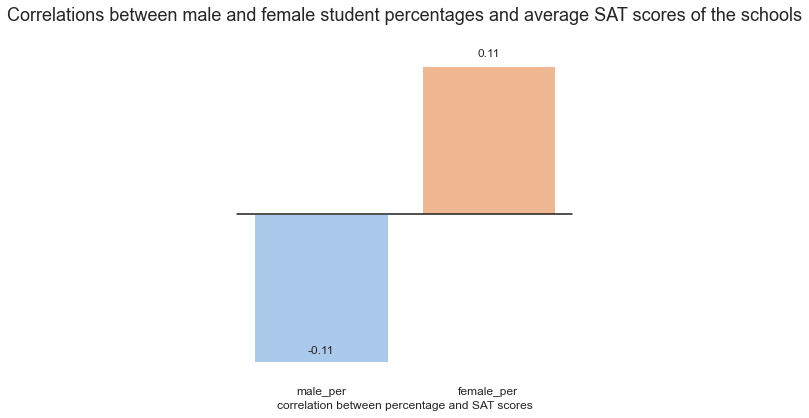

In [35]:
# configurating the size of the plot
fig, ax = plt.subplots(figsize=(6, 6))

# plotting a bar graph
barplot = sns.barplot(x=['male_per', 'female_per'], y='sat_score', 
                      data=corr.loc[['male_per', 'female_per']], 
                      ax=ax, palette='pastel')

# configurating the plot
plt.setp(fig.axes, yticks=[])
plt.xticks(size=12)
plt.xlabel("")
plt.yticks(size=12)
plt.tick_params(bottom=False)

ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("", size=12)
ax.set_xlabel("correlation between percentage and SAT scores", size=12)
ax.set_title("Correlations between male and female student percentages and average SAT scores of the schools", size=18, pad=30)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

# annotating the values in the bars
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width()/2., bar.get_height()), 
                    ha='center', va='center', size=12, xytext=(0,12),
                    textcoords='offset points')


plt.show()

Looking at the graph above, we can see the very interesting information that schools with a higher percentage of female students show, also, a higher average SAT Score, let's look closer at this information using a scatter plot. 

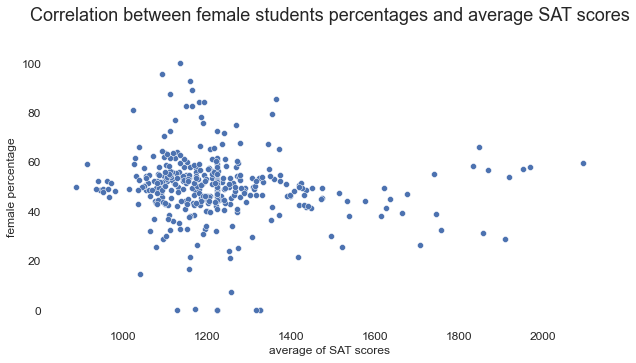

In [36]:
# configurating the size of the image
fig = plt.figure(figsize=(10,5))

# creating the scatter plot
ax = sns.scatterplot(data=combined, x='sat_score', y='male_per')

# configurating the plot
ax.set_ylabel("female percentage", size=12)
ax.set_xlabel("average of SAT scores", size=12)
ax.set_title("Correlation between female students percentages and average SAT scores", size=18, pad=30)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tick_params(bottom=False)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

plt.show()

Looking at the graph above, we can see that the school with the higher average of SAT scores have, also, a specific percentage of female students, this percentages sits in the range of 20% to 70%. To investigate it further, we are going to look at the schools with more than 60% of female students and SAT score higher than 1700. 

In [37]:
combined.loc[(combined['female_per']>60) & (combined['sat_score']>1700), ['SCHOOL NAME', 'sat_score', 'female_per']]

SCHOOL NAME  sat_score  female_per
5                       BARD HIGH SCHOOL EARLY COLLEGE     1856.0        68.7
26                       ELEANOR ROOSEVELT HIGH SCHOOL     1758.0        67.5
60                                  BEACON HIGH SCHOOL     1744.0        61.0
61   FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...     1707.0        73.6
302                        TOWNSEND HARRIS HIGH SCHOOL     1910.0        71.1

Looking closely to the schools above, we can see that the schools are all highly competitive, with Advanced Placement programs and a small amount of students.    
Since this schools have Advanced Placement programs, let's see the influence of it in the average SAT scores.

### 5.4 Advanced Placement exams Correlation
To see if the two informations correlate somehow we need to, first, calculate the percentage of students in each school that took an AP exam. After it we can plot the scatter plot to see the behavior of this relationship.

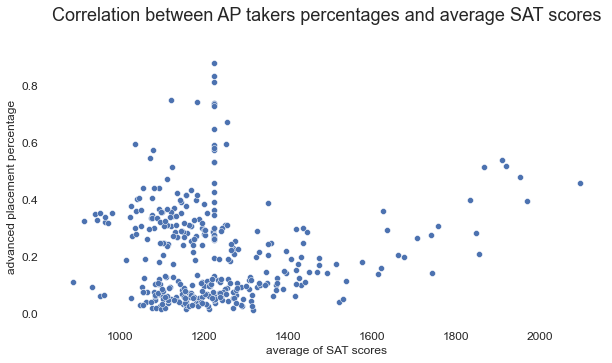

In [38]:
# calculating the percentage
ap_per = combined['AP Test Takers ']/combined['total_enrollment']

combined['ap_per'] = ap_per

# configurating the size of the image
fig = plt.figure(figsize=(10,5))

# creating the scatter plot
ax = sns.scatterplot(data=combined, x='sat_score', y='ap_per')

# configurating the plot
ax.set_ylabel("advanced placement percentage", size=12)
ax.set_xlabel("average of SAT scores", size=12)
ax.set_title("Correlation between AP takers percentages and average SAT scores", size=18, pad=30)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tick_params(bottom=False)

sns.despine(bottom=True, left=True, right=True)
sns.set(style="white")

plt.show()

Looking at the graph above, we can see that the schools with average of SAT scores higher than 1400 correlate more with the percentage of students that did the advanced placement tests, showing that it makes difference in the grades higher than 1400.

## 6 Conclusion

Through the analysis above, we saw that several aspects influence the average SAT of the schools and that, some of them, have a bigger and smaller influence. In a nutshell:  

**Survey Correlations** showed us that `safety and respect scores of students` and `academic expectation scores` have a higher correlation than other survey aspects. This led us to investigate the SAT scores per district, looking at the social information of each one of them. We'll talk more about that below.  


Surprisingly **Gender Correlation** showed us that the amount of female students is positively correlated to the higher scores. 


On the other hand, the existence of **Advanced Placement exams** told us that, as we expected, schools that give this resource to their students, have a higher chance of getting a higher SAT score.

Talking about the SAT average scores by **District** we can see that in the ones where the safety scores are lower, the SAT scores tend to be smaller, showing that the sense of security influences how great the average of the SAT score can be.

When it comes to **Races**, the average of the SAT scores shows us that when a school has a percentage above 30% of Hispanic students, it will fall, probably, into the range of 0 to 1500 average. We saw, after that, the relation of small SAT scores and low Hispanic students percentage, showing that the schools with less Hispanic and less averages, have a high percentage of Black students, this also relates to the **District** where the schools are.  

To conclude we can say that **races** and **location** being badly correlated to the average of the SAT scores show us that the allegations of the tests being unfair to specific racial groups make sense, showing that there is room to improve to make smaller the differences.